## ML/DL based models

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### data loading

In [2]:
df_trees = pd.read_csv('../data Cleaned/housing_trees.csv')
df_trees.drop('Unnamed: 0', axis = 1, inplace = True)
df_trees.head()

,longitude,latitude,housing_median_age,median_income,median_house_value,ocean_proximity,rooms_per_bedroom,population_per_household,bedroom_per_household,room_per_household
0,-122.23,37.88,41.0,8.3252,452600.0,2,6,2,1,6
1,-122.22,37.86,21.0,8.3014,358500.0,2,6,2,0,6
2,-122.24,37.85,52.0,7.2574,352100.0,2,7,2,1,8
3,-122.25,37.85,52.0,5.6431,341300.0,2,5,2,1,5
4,-122.25,37.85,52.0,3.8462,342200.0,2,5,2,1,6


In [7]:
# corr = df_trees.corr()['median_house_value'].sort_values(ascending = False)
# print(corr)

In [3]:
df_distance = pd.read_csv('../data Cleaned/housing_distance.csv')
df_distance.drop('Unnamed: 0', axis = 1, inplace = True)
df_distance.head()

,longitude,latitude,housing_median_age,median_house_value,ocean_proximity,rooms_per_bedroom,population_per_household,bedroom_per_household,room_per_household,median_income
0,0.211155,0.567481,0.784314,0.902266,2,6,2,1,6,1.000000
1,0.212151,0.565356,0.392157,0.708247,2,6,2,0,6,1.000000
2,0.210159,0.564293,1.000000,0.695051,2,7,2,1,8,0.877586
3,0.209163,0.564293,1.000000,0.672783,2,5,2,1,5,0.667939
4,0.209163,0.564293,1.000000,0.674638,2,5,2,1,6,0.434579


In [6]:
# corr = df_distance.corr()['median_house_value'].sort_values(ascending = False)
# print(corr)

### making the train and the test data

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_trees = df_trees.drop('median_house_value', axis = 1)
y_trees = df_trees.median_house_value

In [12]:
X_distance = df_distance.drop('median_house_value', axis = 1)
y_distance = df_distance.median_house_value

In [15]:
X_train_trees, X_test_trees, y_train_trees, y_test_trees = train_test_split(X_trees, y_trees, random_state = 42, test_size = 0.25)
X_train_distance, X_test_distance, y_train_distance, y_test_distance = train_test_split(X_distance, y_distance, random_state = 42, test_size = 0.25)

In [16]:
print(f"{X_train_trees.shape} : {y_train_trees.shape} :: {X_test_trees.shape} : {y_test_trees.shape}")

(15480, 9) : (15480,) :: (5160, 9) : (5160,)


In [17]:
print(f"{X_train_distance.shape} : {y_train_distance.shape} :: {X_test_distance.shape} : {y_test_distance.shape}")

(15480, 9) : (15480,) :: (5160, 9) : (5160,)


### writing the metrices and functions

In [19]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, root_mean_squared_error

In [21]:
def metrices(y_test, y_pred) : 
    print(f"r2 score : {r2_score(y_test, y_pred)}")
    print(f"MAE : {mean_absolute_error(y_test, y_pred)}")
    print(f"RMSE : {root_mean_squared_error(y_test, y_pred)}")
    print(f"MSE : {mean_squared_error(y_test, y_pred)}")

In [22]:
def plot_and_pred(y_test, y_pred) : 
    metrices(y_test, y_pred)
    plt.figure(figsize=(10,6))
    plt.subplot(1, 2, 1)
    plt.scatter(y_test, y_pred, color='blue', alpha=0.5, label='Predicted')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
             color='red', linewidth=2, label='Perfect Prediction Line')
    plt.xlabel('Actual Values (y_test)')
    plt.ylabel('Predicted Values (y_pred)')
    plt.legend()
    plt.grid(True)
   
    plt.subplot(1, 2, 2)
    plt.plot(y_test, label='Actual', color='blue', marker='o')
    plt.plot(y_pred, label='Predicted', color='red', marker='x')
    plt.xlabel('Index')
    plt.ylabel('Target Value')
    plt.legend()
    plt.grid(True)
    plt.show()

## Testing the models

### Distance based models

### 1. Linear regression

r2 score : 0.5761006935510993
MAE : 0.11098079564839261
RMSE : 0.154419997376468
MSE : 0.023845535589748383


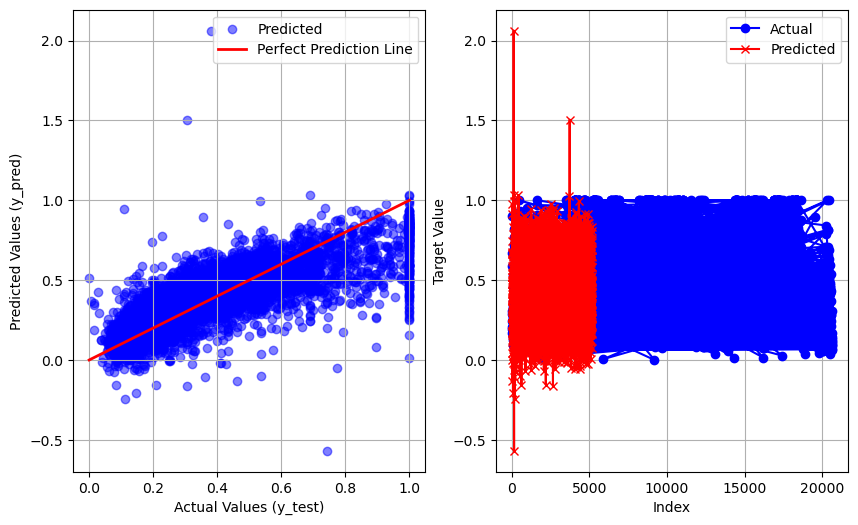

In [23]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train_distance, y_train_distance)
y_pred_lr = lr.predict(X_test_distance)
plot_and_pred(y_test_distance, y_pred_lr)